In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.patches as patches

In [3]:
def pos_plot(position, i, ax=None):
    if ax is None:
        plt.figure(figsize=([4,4]), dpi=300)
        ax = plt.subplot()
    text_size = 18
    ax.plot(position[:,0], position[:,1], "o", markersize=0.025, color="k") #, markeredgecolor="k")
    ax.set_xlabel(r"x [m]", fontsize = text_size)
    ax.set_ylabel(r"y [m]", fontsize = text_size)
    ax.tick_params(direction="in", which="both", top=True, right=True)
    ax.xaxis.set_minor_locator(MultipleLocator(0.05))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    rect = patches.Rectangle((0, 0.5), 2, -0.5, linewidth=8, edgecolor='tab:purple', facecolor='none')
    ax.add_patch(rect)
    title = "Iteration " + str(i)
    ax.set_title(title, fontsize = text_size)

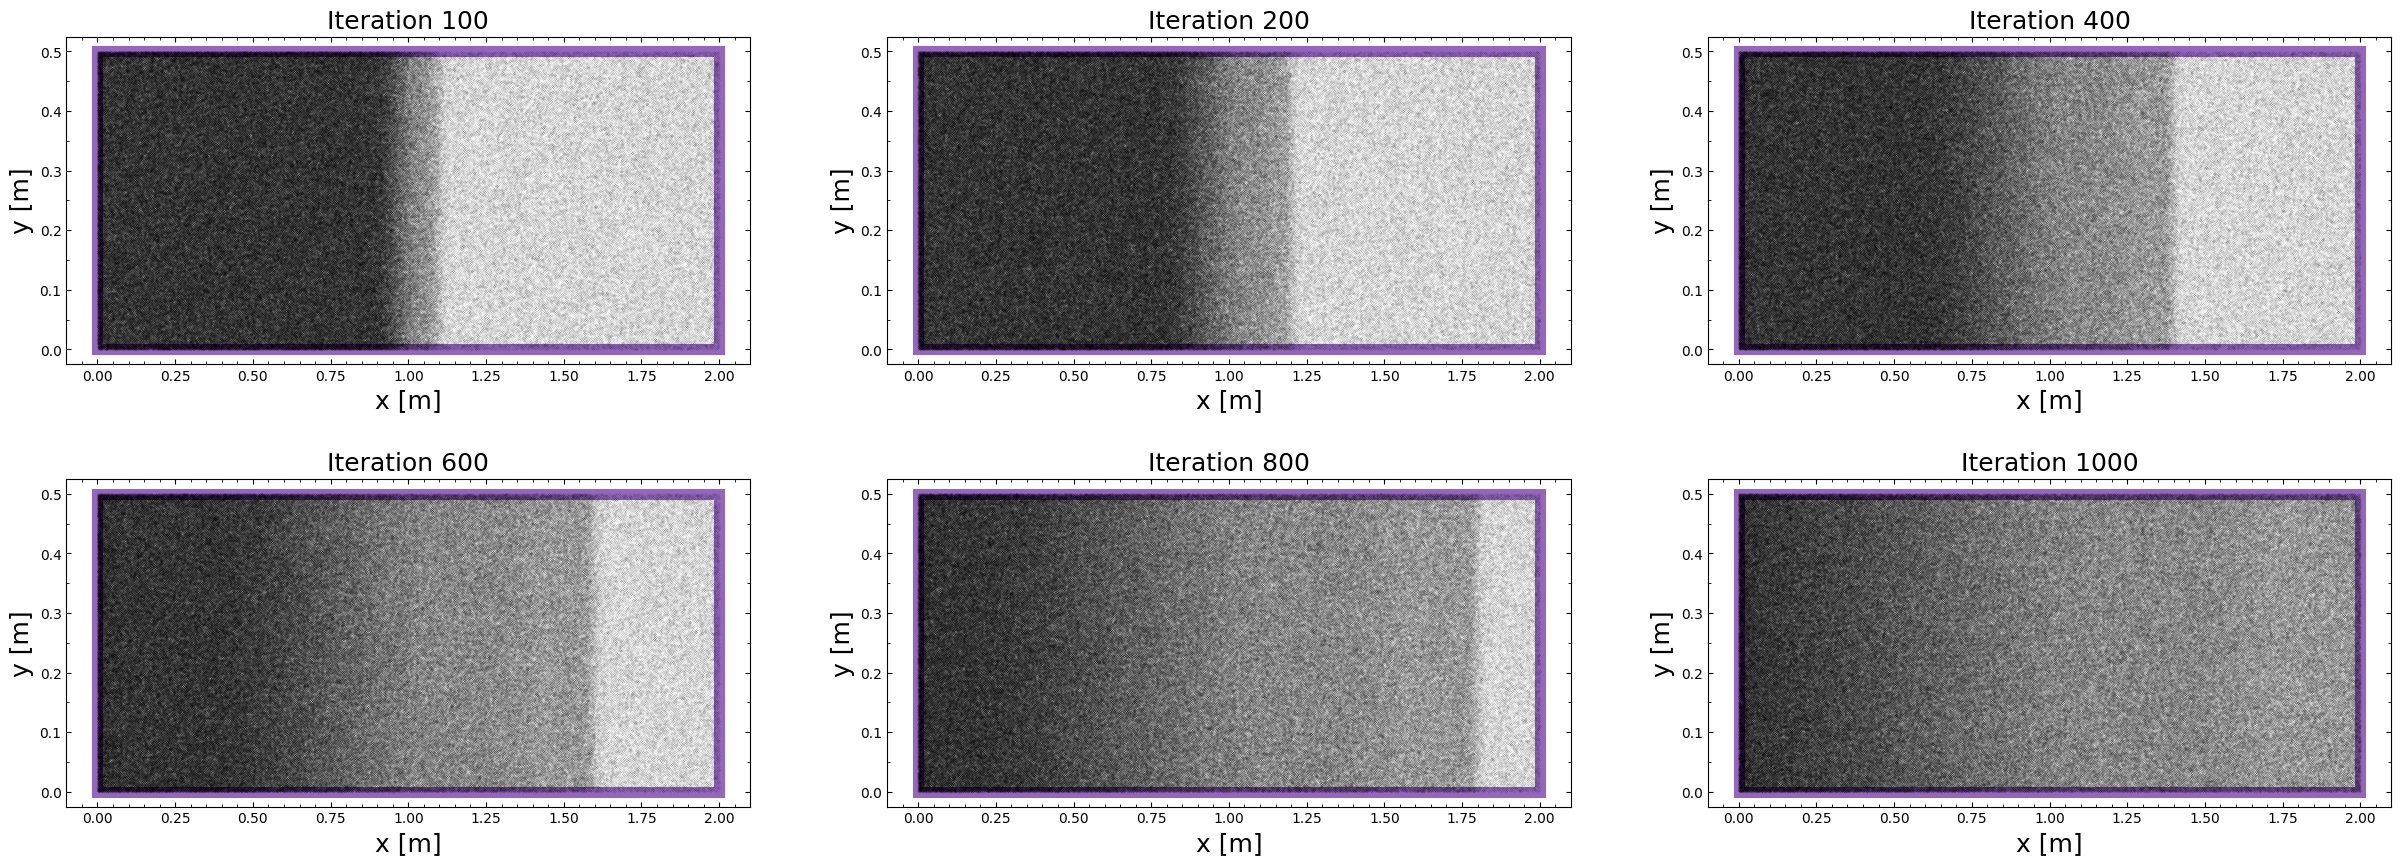

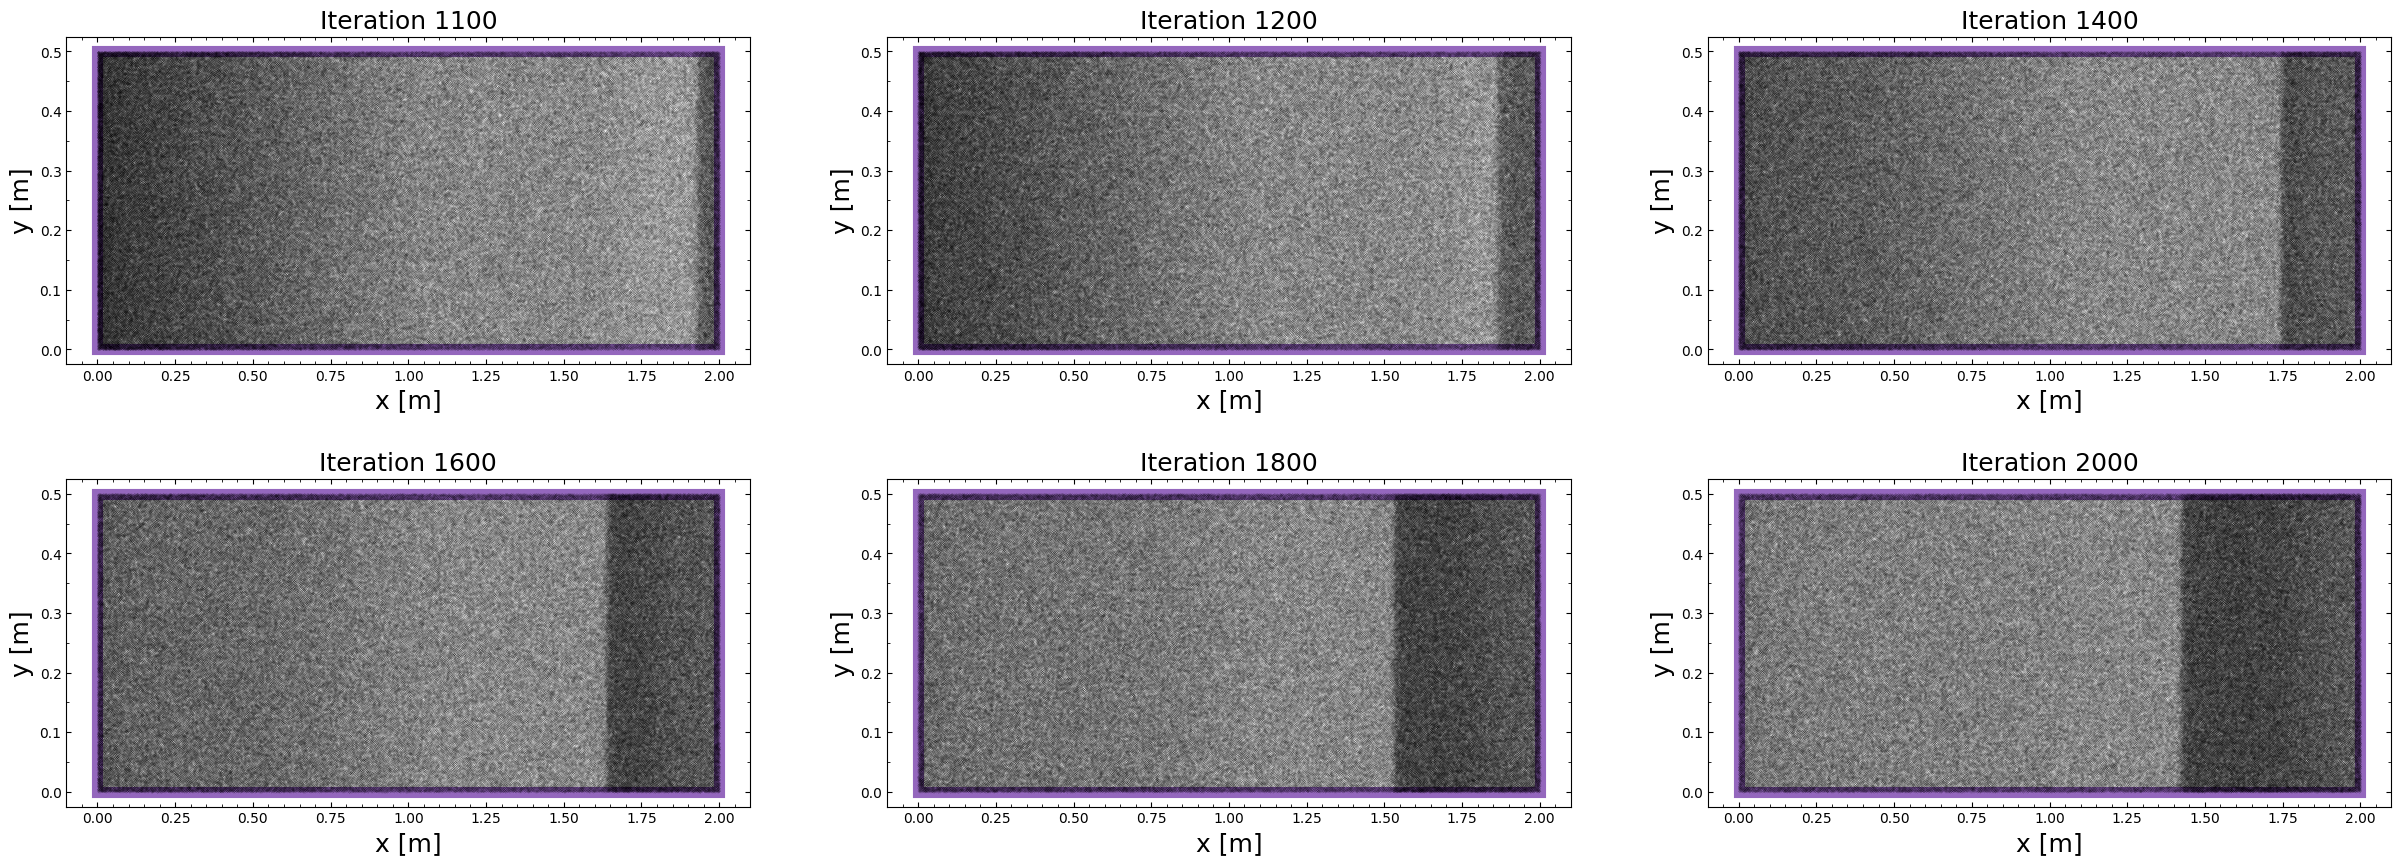

In [4]:
iter = [100, 200, 400, 600, 800, 1000]
ax_num_2 = [0,1,2,0,1,2]
ax_num_1 = [0,0,0,1,1,1]
for folder in [2]:
    for k in range(2):
        fig, axs = plt.subplots(2, 3, figsize=([30,10]))
        for i in range(6):
            ax = axs[ax_num_1[i], ax_num_2[i]]
            file = "wyniki/rv_" + str(iter[i]+1000*(k)) + ".dat"
            position = np.loadtxt(file, dtype=float)
            pos_plot(position, iter[i]+1000*(k), ax=ax)
        plt.subplots_adjust(hspace=0.35, wspace=0.2)
        name = "plot_particles_" + str(k) + ".png"
        plt.savefig(name, dpi=300)
        plt.show()

In [3]:
def plot_temp(x, temp, i, ylabel_text, ax=None):
    text_size = 18

    if ax is None:
        plt.figure(figsize=([4,4]), dpi=300)
        ax = plt.subplot()

    label_text = "it = " + str(i)
    ax.plot(x, temp, label = label_text)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.tick_params(axis='y', direction="in", which="both")
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    # ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    ax.yaxis.set_major_locator(plt.MaxNLocator(9))
    
    ax.tick_params(axis='x', direction="in", top=True, which="both")
    ax.xaxis.set_minor_locator(MultipleLocator(0.05))
    ax.set_xlim([min(x), max(x)])
    ax.grid(True, which="minor", alpha=0.2)

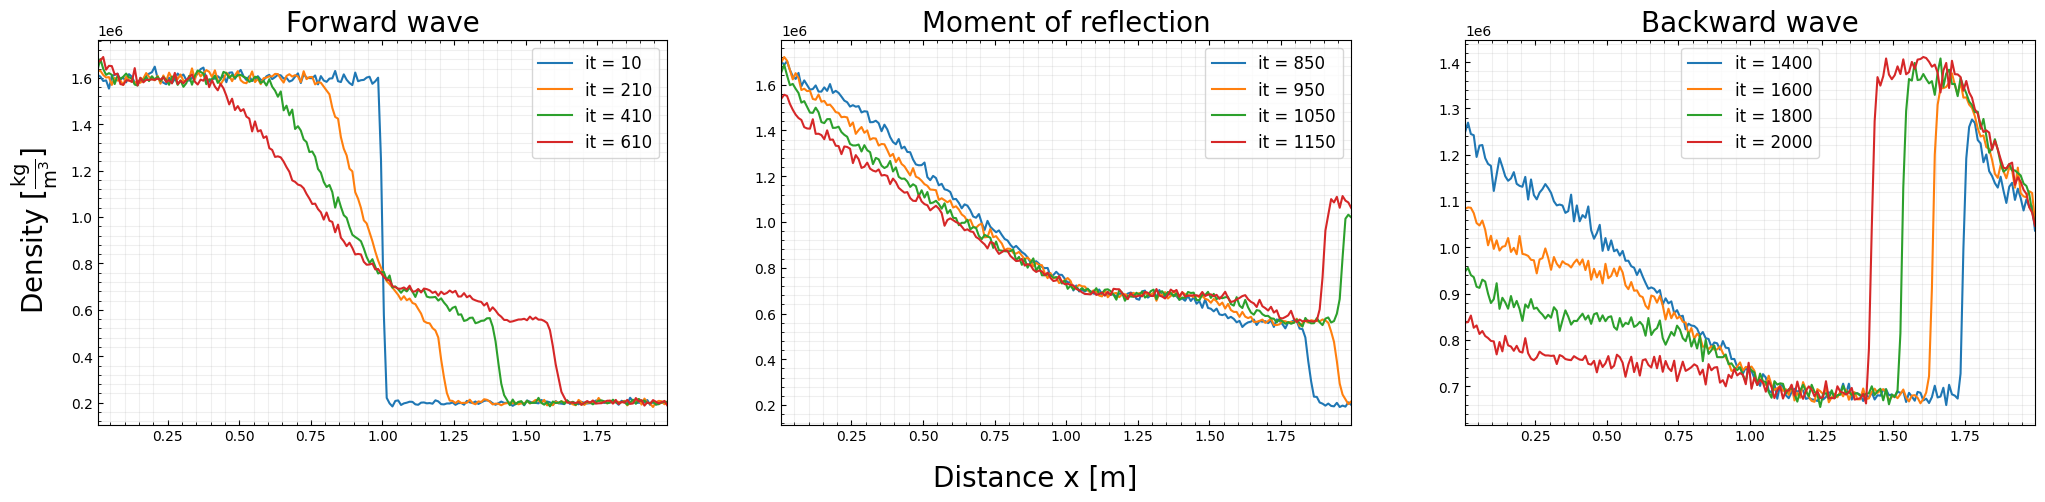

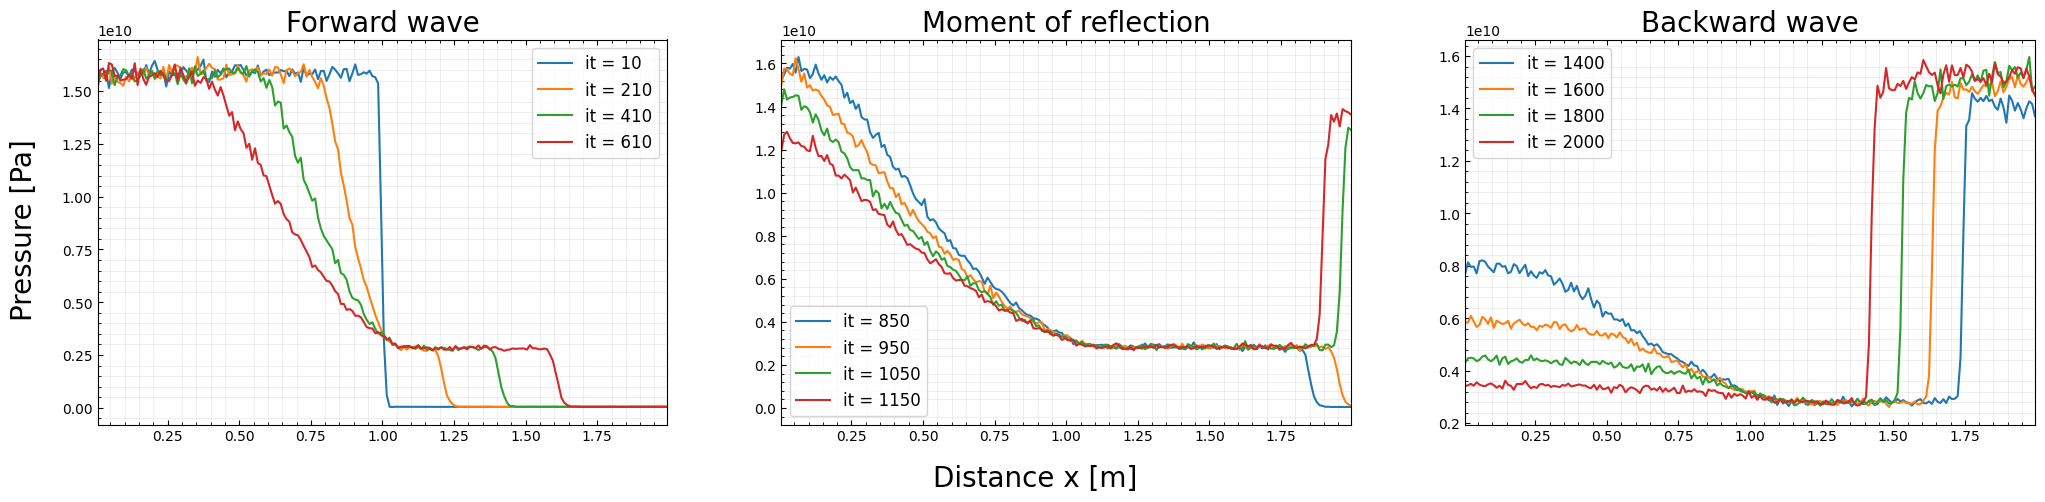

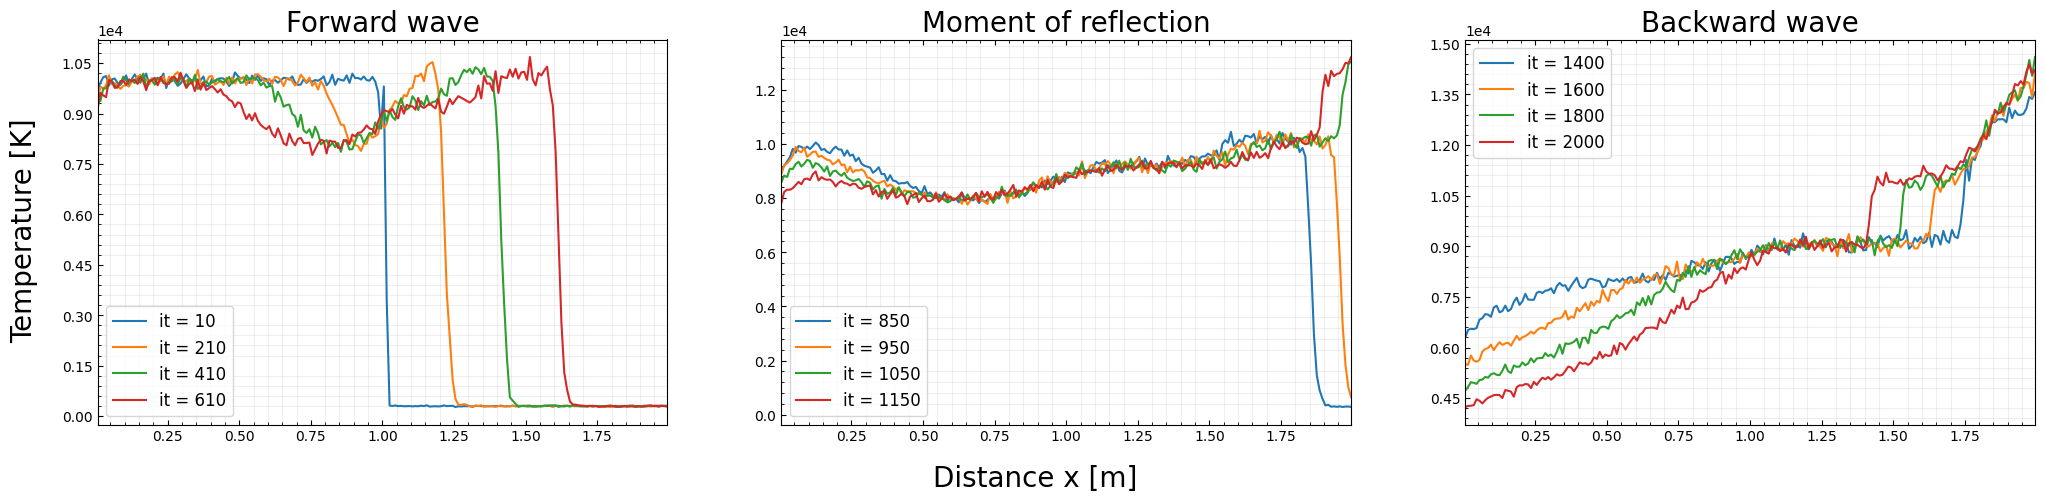

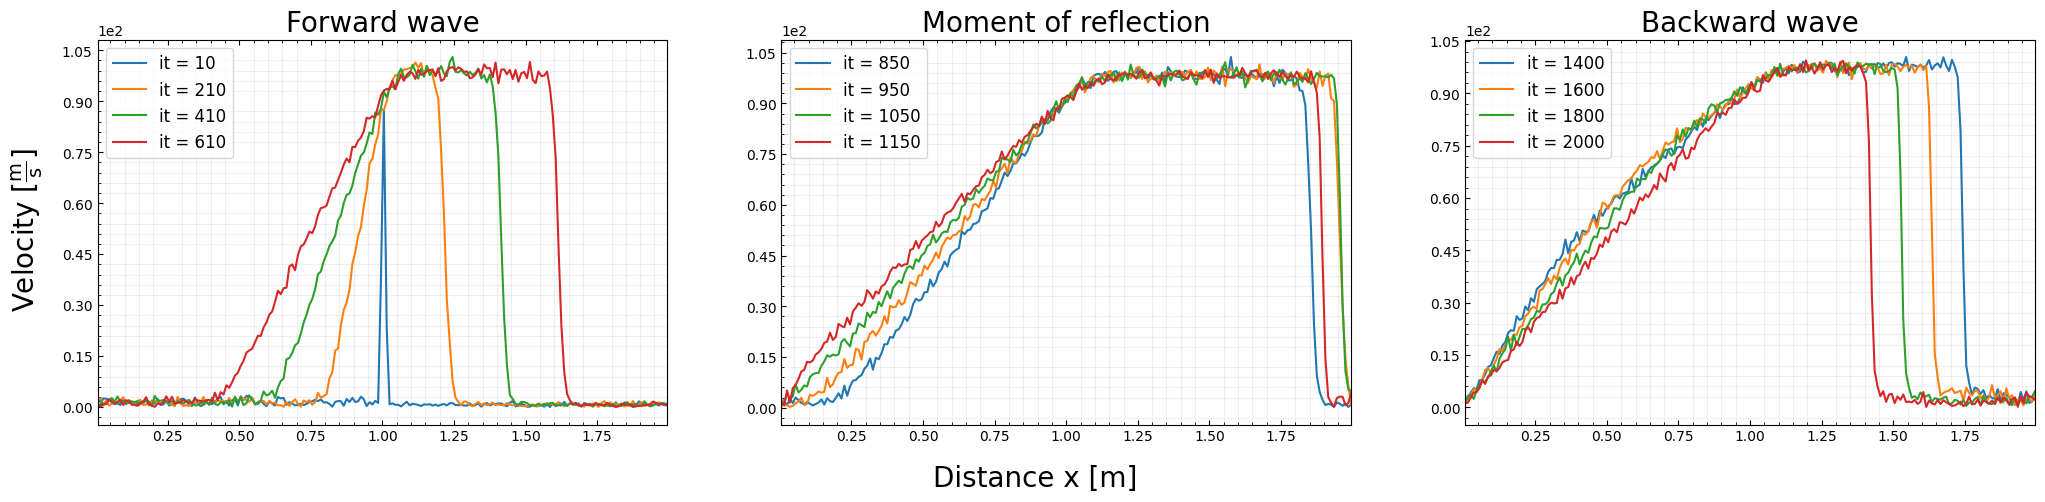

In [10]:
ylabel_texts = [r"Density [$\frac{\text{kg}}{\text{m}^3}$]", r"Pressure [Pa]", r"Temperature [K]", r"Velocity [$\frac{\text{m}}{\text{s}}$]"]
text_size = 12
its1=[10, 210, 410, 610]
its2=[850,950,1050,1150]
its3=[1400, 1600, 1800, 2000]
for k in range(4):
    fig, axs = plt.subplots(1, 3, figsize=([25,5]))
    for q in range(3):
        if q == 0:
            its = its1
            ax = axs[0]
            title_text = "Forward wave"
        if q == 1:
            its = its2
            ax = axs[1]
            title_text = "Moment of reflection"
        if q == 2:
            its = its3
            ax = axs[2]
            title_text = "Backward wave"
        for a in range(len(its)):
            i = its[a]
            file = "wyniki/nptv_" + str(i) + ".dat"
            nptv = np.loadtxt(file, dtype=float)
            x = nptv[:,0]
            data = nptv[:,k+1]
            graph = plot_temp(x, data, i, ylabel_texts[k], ax)
            ax.legend(fontsize=text_size)
            ax.set_title(title_text, fontsize = 20)
        fig.supxlabel('Distance x [m]', fontsize = 20, y = -0.025)
        fig.supylabel(ylabel_texts[k], fontsize = 20, x = 0.09)
    name = "plot" + str(k+1) + ".png"
    plt.savefig(name, dpi=300)
    plt.show()